In [2]:
# Import the libraries we'll need
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("els_extracted_data_v4.csv")
data

,STU_ID,SCH_ID,F3ERN2011,F3C02,F3EVRGED,F3EVERDO,BYMOTHED,BYS14,BYRACE,BYP61,F3ATTAINMENT,BYTXCSTD,BYSES1,F3JUNEDSTAT,F3REGION,F3B35
0,101101,1011,4000,-7,0,0,1,2,5,1,3,56.21,-0.25,3,1,-7
1,101102,1011,3000,20,0,0,5,2,2,0,10,57.66,0.58,3,1,-3
2,101104,1011,37000,50,0,0,2,2,7,0,6,66.50,-0.85,3,1,0
3,101105,1011,1500,25,0,0,2,2,3,-4,4,46.46,-0.80,2,1,1
4,101106,1011,48000,28,0,0,1,2,4,0,4,36.17,-1.41,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,461230,4612,-4,-4,0,0,2,2,4,-4,-4,38.04,-0.34,-4,-4,-4
16193,461231,4612,7000,30,0,1,2,2,4,0,1,33.81,-1.08,4,3,1
16194,461232,4612,-4,-4,0,1,1,2,5,1,-4,37.94,-1.54,-4,-4,-4
16195,461233,4612,20000,40,0,0,1,2,4,0,4,45.93,-1.41,1,3,0


## Step 1: Apply listwise deletion

In [4]:
# Filter data
data = data[data.F3ERN2011 > 0]
data = data[data.F3ERN2011 < 200000]
data = data[data.F3C02 >= 0]
data = data[data.F3JUNEDSTAT >= 3]
data = data[data.BYS14 >= 0]
data = data[data.BYRACE >= 0]
data = data[data.BYTXCSTD >= 0]
data = data[data.F3REGION >= 0]
data = data[data.BYP61 >= -0.25]
data = data[data.BYMOTHED >= 0]
data = data[data.BYTXCSTD >= 0]
data = data[data.F3B35 >= 0]

## Step 2: Prepare data for analysis

<AxesSubplot:>

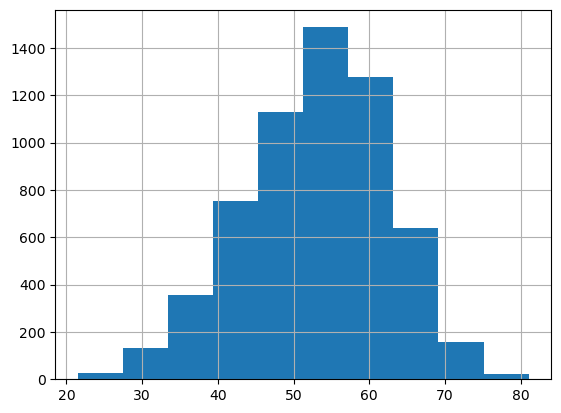

In [5]:
# Explore soe of data here if you need to
data.BYTXCSTD.hist()

In [6]:
# look at modified data
data

,STU_ID,SCH_ID,F3ERN2011,F3C02,F3EVRGED,F3EVERDO,BYMOTHED,BYS14,BYRACE,BYP61,F3ATTAINMENT,BYTXCSTD,BYSES1,F3JUNEDSTAT,F3REGION,F3B35
2,101104,1011,37000,50,0,0,2,2,7,0,6,66.50,-0.85,3,1,0
5,101107,1011,35000,40,0,0,2,1,4,0,3,30.72,-1.07,3,1,1
7,101109,1011,68000,40,0,0,2,1,7,0,6,68.39,-0.16,3,1,1
10,101112,1011,18000,1,0,0,6,1,3,0,3,58.06,-0.18,3,1,0
18,101120,1011,1000,40,1,1,2,1,7,0,2,43.80,-0.57,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16179,461202,4612,20000,38,0,1,1,2,5,0,1,42.40,-1.53,4,3,0
16181,461205,4612,100,6,0,1,2,2,5,1,1,34.70,0.56,4,3,0
16182,461207,4612,29000,40,0,0,3,2,5,1,5,39.53,-0.21,3,3,1
16185,461214,4612,15000,44,0,1,2,1,5,0,2,38.00,-0.60,4,3,0


In [7]:
# Create dummies for BYSEX
data["female"] = (data["BYS14"] == 2).astype(int)

# Check that this method is working by crosstabing the results
pd.crosstab(index=data['BYS14'], columns=data['female'])

female,0,1
BYS14,,
1,2933,0
2,0,3043


In [8]:
# Now that we have verified the code above works for greating dichotomus dummy variables, 
# we can use this same method to safely create the remaining variables.

# For variables which have more than 2 categories, we can use pd.get_dummies()

# Create dummies for BYP61
data["no_parent"] = (data["BYP61"] == 1).astype(int)

# Create dummies for BYMOTHED
moth_dummies = pd.get_dummies(data["BYMOTHED"], prefix="moth_ed")
data = pd.concat([data, moth_dummies], axis=1)

# Create dummies for F3REGION
region_dummies = pd.get_dummies(data["F3REGION"], prefix="region")
data = pd.concat([data, region_dummies], axis=1)

# Create dummies for high_school_grad
data["high_school_grad"] = (data["F3EVERDO"] == 0).astype(int)

# Create dummies for F3EVRGED
data["ged"] = (data["F3EVRGED"] == 1).astype(int)

In [9]:
# Create dummies for BYRACE2, which uses the same coding scheme used for race/ethnicity in the paper
data["BYRACE2"] = np.where(data["BYRACE"].isin([4, 5]), 4,  
                    np.where(data["BYRACE"].isin([1,6]), 1, data["BYRACE"]))

# Check your work!
pd.crosstab(index=data['BYRACE'], columns=data['BYRACE2'])

BYRACE2,1,2,3,4,7
BYRACE,,,,,
1,50,0,0,0,0
2,0,426,0,0,0
3,0,0,539,0,0
4,0,0,0,342,0
5,0,0,0,384,0
6,246,0,0,0,0
7,0,0,0,0,3989


In [10]:
# Once you've check your work, now make dummies
race_dummies = pd.get_dummies(data["BYRACE2"])
race_dummies # we need to use better column names so it's not confusing

,1,2,3,4,7
2,0,0,0,0,1
5,0,0,0,1,0
7,0,0,0,0,1
10,0,0,1,0,0
18,0,0,0,0,1
...,...,...,...,...,...
16179,0,0,0,1,0
16181,0,0,0,1,0
16182,0,0,0,1,0
16185,0,0,0,1,0


In [11]:
race_dummies.rename(columns={1:'Other', 
                             2:'Asian',
                             3:'Black',
                             4:'Hispanic',
                             7:'White'}, inplace=True) 
race_dummies

,Other,Asian,Black,Hispanic,White
2,0,0,0,0,1
5,0,0,0,1,0
7,0,0,0,0,1
10,0,0,1,0,0
18,0,0,0,0,1
...,...,...,...,...,...
16179,0,0,0,1,0
16181,0,0,0,1,0
16182,0,0,0,1,0
16185,0,0,0,1,0


In [12]:
print(pd.crosstab(index=race_dummies["Other"], columns=data['BYRACE']))
print("\n")
print(pd.crosstab(index=race_dummies["Asian"], columns=data['BYRACE']))
print("\n")
print(pd.crosstab(index=race_dummies["Black"], columns=data['BYRACE']))
print("\n")
print(pd.crosstab(index=race_dummies["Hispanic"], columns=data['BYRACE']))
print("\n")
print(pd.crosstab(index=race_dummies["White"], columns=data['BYRACE']))

BYRACE   1    2    3    4    5    6     7
Other                                    
0        0  426  539  342  384    0  3989
1       50    0    0    0    0  246     0


BYRACE   1    2    3    4    5    6     7
Asian                                    
0       50    0  539  342  384  246  3989
1        0  426    0    0    0    0     0


BYRACE   1    2    3    4    5    6     7
Black                                    
0       50  426    0  342  384  246  3989
1        0    0  539    0    0    0     0


BYRACE     1    2    3    4    5    6     7
Hispanic                                   
0         50  426  539    0    0  246  3989
1          0    0    0  342  384    0     0


BYRACE   1    2    3    4    5    6     7
White                                    
0       50  426  539  342  384  246     0
1        0    0    0    0    0    0  3989


In [13]:
# note that this produces prettier print! But it does take up more space
pd.crosstab(index=race_dummies["Asian"], columns=data['BYRACE'])

BYRACE,1,2,3,4,5,6,7
Asian,,,,,,,
0,50,0,539,342,384,246,3989
1,0,426,0,0,0,0,0


In [14]:
# Since the dummies are good, we need to add them to our dataset
data = pd.concat([data, race_dummies], axis=1)
data

,STU_ID,SCH_ID,F3ERN2011,F3C02,F3EVRGED,F3EVERDO,BYMOTHED,BYS14,BYRACE,BYP61,...,region_3,region_4,high_school_grad,ged,BYRACE2,Other,Asian,Black,Hispanic,White
2,101104,1011,37000,50,0,0,2,2,7,0,...,0,0,1,0,7,0,0,0,0,1
5,101107,1011,35000,40,0,0,2,1,4,0,...,0,0,1,0,4,0,0,0,1,0
7,101109,1011,68000,40,0,0,2,1,7,0,...,0,0,1,0,7,0,0,0,0,1
10,101112,1011,18000,1,0,0,6,1,3,0,...,0,0,1,0,3,0,0,1,0,0
18,101120,1011,1000,40,1,1,2,1,7,0,...,0,0,0,1,7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16179,461202,4612,20000,38,0,1,1,2,5,0,...,1,0,0,0,4,0,0,0,1,0
16181,461205,4612,100,6,0,1,2,2,5,1,...,1,0,0,0,4,0,0,0,1,0
16182,461207,4612,29000,40,0,0,3,2,5,1,...,1,0,1,0,4,0,0,0,1,0
16185,461214,4612,15000,44,0,1,2,1,5,0,...,1,0,0,0,4,0,0,0,1,0


In [15]:
# Recode highest education into years of education 
def post_sec_edu(value):
    if value == 4:
        return 1
    elif value == 5:
        return 2
    elif value == 6:
        return 4
    elif value == 7:
        return 5
    elif value == 8:
        return 6
    elif value == 10:
        return 8
    else:
        return 0
data['post_sec_edu'] = data['F3ATTAINMENT'].apply(post_sec_edu)
pd.crosstab(index=data["post_sec_edu"], columns=data['F3ATTAINMENT'])

F3ATTAINMENT,1,2,3,4,5,6,7,8,10
post_sec_edu,,,,,,,,,
0,117,646,1357,0,0,0,0,0,0
1,0,0,0,513,0,0,0,0,0
2,0,0,0,0,426,0,0,0,0
4,0,0,0,0,0,2260,0,0,0
5,0,0,0,0,0,0,50,0,0
6,0,0,0,0,0,0,0,479,0
8,0,0,0,0,0,0,0,0,128


In [16]:
# See final dataset
data

,STU_ID,SCH_ID,F3ERN2011,F3C02,F3EVRGED,F3EVERDO,BYMOTHED,BYS14,BYRACE,BYP61,...,region_4,high_school_grad,ged,BYRACE2,Other,Asian,Black,Hispanic,White,post_sec_edu
2,101104,1011,37000,50,0,0,2,2,7,0,...,0,1,0,7,0,0,0,0,1,4
5,101107,1011,35000,40,0,0,2,1,4,0,...,0,1,0,4,0,0,0,1,0,0
7,101109,1011,68000,40,0,0,2,1,7,0,...,0,1,0,7,0,0,0,0,1,4
10,101112,1011,18000,1,0,0,6,1,3,0,...,0,1,0,3,0,0,1,0,0,0
18,101120,1011,1000,40,1,1,2,1,7,0,...,0,0,1,7,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16179,461202,4612,20000,38,0,1,1,2,5,0,...,0,0,0,4,0,0,0,1,0,0
16181,461205,4612,100,6,0,1,2,2,5,1,...,0,0,0,4,0,0,0,1,0,0
16182,461207,4612,29000,40,0,0,3,2,5,1,...,0,1,0,4,0,0,0,1,0,2
16185,461214,4612,15000,44,0,1,2,1,5,0,...,0,0,0,4,0,0,0,1,0,0


## Step 3: Replicate descriptive statistics table

In [29]:
df = data[['high_school_grad','ged','F3ERN2011','F3C02','female','Black','Hispanic','Asian','White','Other','BYSES1','BYTXCSTD','BYP61','F3ATTAINMENT','F3B35','BYMOTHED','F3REGION']]
# Add three columns that weren't present
df.insert(loc = 3,
          column = 'Log income 2011',
          value = np.log(data.F3ERN2011)
)
df.insert(loc = 5,
          column = 'Log of hours worked in 2011',
          value = np.log(data.F3C02)
         )
df.insert(loc = len(df.columns)-2,
         column = 'GED*Composite test score',
          value = data.F3EVRGED*data.BYTXCSTD
         )

# Rename the columns
df.columns = ['high_school_grad','ged','Income in 2011','Log income 2011','Hours worked in 2011','Log of hours worked in 2011','Female','Black or African American','Hispanic','Asian','White','Other','Socioeconomic status','Composite test score','Absence of biological parent','Years of post-secondary education','On-the-job-training','GED*Composite test score','Maternal education','Region of the US']
df 

,high_school_grad,ged,Income in 2011,Log income 2011,Hours worked in 2011,Log of hours worked in 2011,Female,Black or African American,Hispanic,Asian,White,Other,Socioeconomic status,Composite test score,Absence of biological parent,Years of post-secondary education,On-the-job-training,GED*Composite test score,Maternal education,Region of the US
2,1,0,37000,10.518673,50,3.912023,1,0,0,0,1,0,-0.85,66.50,0,6,0,0.0,2,1
5,1,0,35000,10.463103,40,3.688879,0,0,1,0,0,0,-1.07,30.72,0,3,1,0.0,2,1
7,1,0,68000,11.127263,40,3.688879,0,0,0,0,1,0,-0.16,68.39,0,6,1,0.0,2,1
10,1,0,18000,9.798127,1,0.000000,0,1,0,0,0,0,-0.18,58.06,0,3,0,0.0,6,1
18,0,1,1000,6.907755,40,3.688879,0,0,0,0,1,0,-0.57,43.80,0,2,0,43.8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16179,0,0,20000,9.903488,38,3.637586,1,0,1,0,0,0,-1.53,42.40,0,1,0,0.0,1,3
16181,0,0,100,4.605170,6,1.791759,1,0,1,0,0,0,0.56,34.70,1,1,0,0.0,2,3
16182,1,0,29000,10.275051,40,3.688879,1,0,1,0,0,0,-0.21,39.53,1,5,1,0.0,3,3
16185,0,0,15000,9.615805,44,3.784190,0,0,1,0,0,0,-0.60,38.00,0,2,0,0.0,2,3


In [31]:
#Create a 3-level nominal variable to track highschool graduation, the ged, and dropout status -
# we ar coding these in a mututally exclusive manner
df["edu"] = np.where(df["high_school_grad"] == 1, "hsg", np.where(df["ged"] == 1, "ged", "dropout")) 

# Check work
print(pd.crosstab(index=df['high_school_grad'], columns=df['edu']))
print(pd.crosstab(index=df['ged'][ df['high_school_grad'] != 1], columns=df['edu'][ df['high_school_grad'] != 1]))

edu               dropout  ged   hsg
high_school_grad                    
0                     261  211     0
1                       0    0  5504
edu  dropout  ged
ged              
0        261    0
1          0  211


C:\Users\nicka\AppData\Local\Temp\ipykernel_28000\1799205082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["edu"] = np.where(df["high_school_grad"] == 1, "hsg", np.where(df["ged"] == 1, "ged", "dropout"))


In [32]:
# df2: Create df to get the stats for ALL students types in the next step
df2 = df.copy().drop(['high_school_grad','ged', 'Maternal education','Region of the US'],axis = 1) 
df2

,Income in 2011,Log income 2011,Hours worked in 2011,Log of hours worked in 2011,Female,Black or African American,Hispanic,Asian,White,Other,Socioeconomic status,Composite test score,Absence of biological parent,Years of post-secondary education,On-the-job-training,GED*Composite test score,edu
2,37000,10.518673,50,3.912023,1,0,0,0,1,0,-0.85,66.50,0,6,0,0.0,hsg
5,35000,10.463103,40,3.688879,0,0,1,0,0,0,-1.07,30.72,0,3,1,0.0,hsg
7,68000,11.127263,40,3.688879,0,0,0,0,1,0,-0.16,68.39,0,6,1,0.0,hsg
10,18000,9.798127,1,0.000000,0,1,0,0,0,0,-0.18,58.06,0,3,0,0.0,hsg
18,1000,6.907755,40,3.688879,0,0,0,0,1,0,-0.57,43.80,0,2,0,43.8,ged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16179,20000,9.903488,38,3.637586,1,0,1,0,0,0,-1.53,42.40,0,1,0,0.0,dropout
16181,100,4.605170,6,1.791759,1,0,1,0,0,0,0.56,34.70,1,1,0,0.0,dropout
16182,29000,10.275051,40,3.688879,1,0,1,0,0,0,-0.21,39.53,1,5,1,0.0,hsg
16185,15000,9.615805,44,3.784190,0,0,1,0,0,0,-0.60,38.00,0,2,0,0.0,dropout


In [33]:
# calculate the mean and the standard deviation for all kinds of students
s_all = df2.agg(['mean','std']).T.stack()
s_all

C:\Users\nicka\AppData\Local\Temp\ipykernel_28000\1239885991.py:2: FutureWarning: ['edu'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  s_all = df2.agg(['mean','std']).T.stack()


Income in 2011                     mean    31758.221218
                                   std     21799.318892
Log income 2011                    mean       10.064824
                                   std         0.948072
Hours worked in 2011               mean       41.154953
                                   std        11.961910
Log of hours worked in 2011        mean        3.664850
                                   std         0.362855
Female                             mean        0.509203
                                   std         0.499957
Black or African American          mean        0.090194
                                   std         0.286484
Hispanic                           mean        0.121486
                                   std         0.326718
Asian                              mean        0.071285
                                   std         0.257322
White                              mean        0.667503
                                   std         0

In [36]:
# group by edu to see mean and std
df_temp = df.copy().drop(['high_school_grad','ged', 'Maternal education','Region of the US'],axis = 1) 
df3 = df_temp.groupby(df['edu']).agg(['mean','std']) #edit 4: don't overwrite the df DataFrame, in case we need it later. Also, slice from df2 and not df
df3

C:\Users\nicka\AppData\Local\Temp\ipykernel_28000\413941168.py:3: FutureWarning: ['edu'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df3 = df_temp.groupby(df['edu']).agg(['mean','std']) #edit 4: don't overwrite the df DataFrame, in case we need it later. Also, slice from df2 and not df


Income in 2011               Log income 2011            \
                  mean           std            mean       std   
edu                                                              
dropout   22837.164751  18125.395434        9.626757  1.142226   
ged       21636.018957  17190.369155        9.574507  1.115721   
hsg       32569.300509  21927.372283       10.104394  0.920273   

        Hours worked in 2011            Log of hours worked in 2011            \
                        mean        std                        mean       std   
edu                                                                             
dropout            39.176245  12.479505                    3.601560  0.414921   
ged                39.924171  13.963351                    3.614487  0.423736   
hsg                41.295967  11.844738                    3.669781  0.357295   

           Female            ... Composite test score            \
             mean       std  ...                 mean       std   
edu                          ...                                  
dropout  0.398467  0.490523  ...            42.631226  9.006261   
ged      0.379147  0.486329  ...            46.496445  7.816584   
hsg      0.519440  0.499667  ...            53.729644  9.097973   

        Absence of biological parent            \
                                mean       std   
edu                                              
dropout                     0.436782  0.496940   
ged                         0.478673  0.500733   
hsg                         0.248001  0.431892   

        Years of post-secondary education           On-the-job-training  \
                                     mean       std                mean   
edu                                                                       
dropout                          2.233716  1.486792            0.295019   
ged                              2.933649  1.012002            0.374408   
hsg                              4.993096  1.902099            0.472020   

                  GED*Composite test score            
              std                     mean       std  
edu                                                   
dropout  0.456928                 0.000000  0.000000  
ged      0.485121                46.496445  7.816584  
hsg      0.499262                 0.134322  2.518052  

[3 rows x 32 columns]

In [37]:
# transpose the data frame, so the attributes goes to the left, 
# just like the original table
df3 = df3.T
df3  

edu                                          dropout           ged  \
Income in 2011                    mean  22837.164751  21636.018957   
                                  std   18125.395434  17190.369155   
Log income 2011                   mean      9.626757      9.574507   
                                  std       1.142226      1.115721   
Hours worked in 2011              mean     39.176245     39.924171   
                                  std      12.479505     13.963351   
Log of hours worked in 2011       mean      3.601560      3.614487   
                                  std       0.414921      0.423736   
Female                            mean      0.398467      0.379147   
                                  std       0.490523      0.486329   
Black or African American         mean      0.191571      0.127962   
                                  std       0.394293      0.334842   
Hispanic                          mean      0.279693      0.208531   
                                  std       0.449711      0.407224   
Asian                             mean      0.057471      0.018957   
                                  std       0.233188      0.136699   
White                             mean      0.394636      0.549763   
                                  std       0.489711      0.498701   
Other                             mean      0.076628      0.094787   
                                  std       0.266512      0.293617   
Socioeconomic status              mean     -0.476169     -0.322180   
                                  std       0.639562      0.651020   
Composite test score              mean     42.631226     46.496445   
                                  std       9.006261      7.816584   
Absence of biological parent      mean      0.436782      0.478673   
                                  std       0.496940      0.500733   
Years of post-secondary education mean      2.233716      2.933649   
                                  std       1.486792      1.012002   
On-the-job-training               mean      0.295019      0.374408   
                                  std       0.456928      0.485121   
GED*Composite test score          mean      0.000000     46.496445   
                                  std       0.000000      7.816584   

edu                                              hsg  
Income in 2011                    mean  32569.300509  
                                  std   21927.372283  
Log income 2011                   mean     10.104394  
                                  std       0.920273  
Hours worked in 2011              mean     41.295967  
                                  std      11.844738  
Log of hours worked in 2011       mean      3.669781  
                                  std       0.357295  
Female                            mean      0.519440  
                                  std       0.499667  
Black or African American         mean      0.083939  
                                  std       0.277321  
Hispanic                          mean      0.110647  
                                  std       0.313723  
Asian                             mean      0.073946  
                                  std       0.261707  
White                             mean      0.684956  
                                  std       0.464575  
Other                             mean      0.046512  
                                  std       0.210609  
Socioeconomic status              mean      0.211701  
                                  std       0.719627  
Composite test score              mean     53.729644  
                                  std       9.097973  
Absence of biological parent      mean      0.248001  
                                  std       0.431892  
Years of post-secondary education mean      4.993096  
                                  std       1.902099  
On-the-job-training               mean      0.472020  
                                  std  

In [45]:
# add the overall series to the dataframe as a new columm
df4 = pd.merge(df3,s_all.rename('All'),left_index= True,right_index=True)
df4

dropout           ged  \
Income in 2011                    mean  22837.164751  21636.018957   
                                  std   18125.395434  17190.369155   
Log income 2011                   mean      9.626757      9.574507   
                                  std       1.142226      1.115721   
Hours worked in 2011              mean     39.176245     39.924171   
                                  std      12.479505     13.963351   
Log of hours worked in 2011       mean      3.601560      3.614487   
                                  std       0.414921      0.423736   
Female                            mean      0.398467      0.379147   
                                  std       0.490523      0.486329   
Black or African American         mean      0.191571      0.127962   
                                  std       0.394293      0.334842   
Hispanic                          mean      0.279693      0.208531   
                                  std       0.449711      0.407224   
Asian                             mean      0.057471      0.018957   
                                  std       0.233188      0.136699   
White                             mean      0.394636      0.549763   
                                  std       0.489711      0.498701   
Other                             mean      0.076628      0.094787   
                                  std       0.266512      0.293617   
Socioeconomic status              mean     -0.476169     -0.322180   
                                  std       0.639562      0.651020   
Composite test score              mean     42.631226     46.496445   
                                  std       9.006261      7.816584   
Absence of biological parent      mean      0.436782      0.478673   
                                  std       0.496940      0.500733   
Years of post-secondary education mean      2.233716      2.933649   
                                  std       1.486792      1.012002   
On-the-job-training               mean      0.295019      0.374408   
                                  std       0.456928      0.485121   
GED*Composite test score          mean      0.000000     46.496445   
                                  std       0.000000      7.816584   

                                                 hsg           All  
Income in 2011                    mean  32569.300509  31758.221218  
                                  std   21927.372283  21799.318892  
Log income 2011                   mean     10.104394     10.064824  
                                  std       0.920273      0.948072  
Hours worked in 2011              mean     41.295967     41.154953  
                                  std      11.844738     11.961910  
Log of hours worked in 2011       mean      3.669781      3.664850  
                                  std       0.357295      0.362855  
Female                            mean      0.519440      0.509203  
                                  std       0.499667      0.499957  
Black or African American         mean      0.083939      0.090194  
                                  std       0.277321      0.286484  
Hispanic                          mean      0.110647      0.121486  
                                  std       0.313723      0.326718  
Asian                             mean      0.073946      0.071285  
                                  std       0.261707      0.257322  
White                             mean      0.684956      0.667503  
                                  std       0.464575      0.471147  
Other                             mean      0.046512      0.049531  
                                  std       0.210609      0.216993  
Socioeconomic status              mean      0.211701      0.162808  
                                  std       0.719627      0.733480  
Composite test score              mean     53.729644     52.989535  
                                  std       9.097973      9.412314  
Absence o

In [46]:
# round the data to 2 decimals
df4 = df4.round(2)
# change the format of the integers, so that there is a comma between every three digits
df4 = df4.apply(lambda series: series.apply(lambda value: f"{value:,}"))

In [47]:
# loop through the columns, if it's an std column, then we add parentheses
for index, row in df4.iterrows():
    if 'std' in index:
        df4.loc[index] = df4.loc[index].apply(lambda x: f"({x})")
df4

dropout          ged          hsg  \
Income in 2011                    mean   22,837.16    21,636.02     32,569.3   
                                  std   (18,125.4)  (17,190.37)  (21,927.37)   
Log income 2011                   mean        9.63         9.57         10.1   
                                  std       (1.14)       (1.12)       (0.92)   
Hours worked in 2011              mean       39.18        39.92         41.3   
                                  std      (12.48)      (13.96)      (11.84)   
Log of hours worked in 2011       mean         3.6         3.61         3.67   
                                  std       (0.41)       (0.42)       (0.36)   
Female                            mean         0.4         0.38         0.52   
                                  std       (0.49)       (0.49)        (0.5)   
Black or African American         mean        0.19         0.13         0.08   
                                  std       (0.39)       (0.33)       (0.28)   
Hispanic                          mean        0.28         0.21         0.11   
                                  std       (0.45)       (0.41)       (0.31)   
Asian                             mean        0.06         0.02         0.07   
                                  std       (0.23)       (0.14)       (0.26)   
White                             mean        0.39         0.55         0.68   
                                  std       (0.49)        (0.5)       (0.46)   
Other                             mean        0.08         0.09         0.05   
                                  std       (0.27)       (0.29)       (0.21)   
Socioeconomic status              mean       -0.48        -0.32         0.21   
                                  std       (0.64)       (0.65)       (0.72)   
Composite test score              mean       42.63         46.5        53.73   
                                  std       (9.01)       (7.82)        (9.1)   
Absence of biological parent      mean        0.44         0.48         0.25   
                                  std        (0.5)        (0.5)       (0.43)   
Years of post-secondary education mean        2.23         2.93         4.99   
                                  std       (1.49)       (1.01)        (1.9)   
On-the-job-training               mean         0.3         0.37         0.47   
                                  std       (0.46)       (0.49)        (0.5)   
GED*Composite test score          mean         0.0         46.5         0.13   
                                  std        (0.0)       (7.82)       (2.52)   

                                                All  
Income in 2011                    mean    31,758.22  
                                  std   (21,799.32)  
Log income 2011                   mean        10.06  
                                  std        (0.95)  
Hours worked in 2011              mean        41.15  
                                  std       (11.96)  
Log of hours worked in 2011       mean         3.66  
                                  std        (0.36)  
Female                            mean         0.51  
                                  std         (0.5)  
Black or African American         mean         0.09  
                                  std        (0.29)  
Hispanic                          mean         0.12  
                                  std        (0.33)  
Asian                             mean         0.07  
                                  std        (0.26)  
White                             mean         0.67  
                                  std        (0.47)  
Other                             mean         0.05  
                                  std        (0.22)  
Socioeconomic status              mean         0.16  
                                  std        (0.73)  
Composite test score              mean        52.99  
                                  std        (9.41)  
Absence of biological parent      mean         0.26 

## Step 4: Replicate modeling results

In [88]:
# Model 1
import statsmodels.api as sm  # library for estimating regression models

# Define the formula for the model1
formula = 'np.log(F3ERN2011) ~ ged + high_school_grad + female + Black + Hispanic + Asian + Other + BYSES1 + no_parent + BYTXCSTD'

# Fit the multilevel model using the formula
model = sm.MixedLM.from_formula(formula, data, groups=data["SCH_ID"])
result = model.fit()

# Print the summary of the model
print(result.summary())


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(F3ERN2011)
No. Observations: 5976    Method:             REML             
No. Groups:       739     Scale:              0.8143           
Min. group size:  1       Log-Likelihood:     -7936.9398       
Max. group size:  24      Converged:          Yes              
Mean group size:  8.1                                          
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             9.196    0.092 99.917 0.000  9.016  9.377
ged                  -0.116    0.079 -1.460 0.144 -0.271  0.040
high_school_grad      0.245    0.058  4.207 0.000  0.131  0.358
female               -0.232    0.024 -9.763 0.000 -0.278 -0.185
Black                -0.187    0.044 -4.224 0.000 -0.273 -0.100
Hispanic             -0.063    0.040 -1.582 0.114 -0.

In [89]:
# model 2
# Define the formula for the model 2
formula = 'np.log(F3ERN2011) ~ ged + high_school_grad + female + Black + Hispanic + Asian + Other + BYSES1 + no_parent + BYTXCSTD  + F3B35 + post_sec_edu'

# Fit the multilevel model using the formula
model = sm.MixedLM.from_formula(formula, data, groups=data["SCH_ID"])
result = model.fit()

# Print the summary of the model
print(result.summary())

C:\Users\nicho\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(F3ERN2011)
No. Observations: 5976    Method:             REML             
No. Groups:       739     Scale:              0.7930           
Min. group size:  1       Log-Likelihood:     -7853.0030       
Max. group size:  24      Converged:          Yes              
Mean group size:  8.1                                          
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            9.264    0.092 100.273 0.000  9.083  9.445
ged                 -0.110    0.078  -1.409 0.159 -0.263  0.043
high_school_grad     0.174    0.058   3.026 0.002  0.061  0.287
female              -0.265    0.024 -11.216 0.000 -0.312 -0.219
Black               -0.212    0.043  -4.884 0.000 -0.297 -0.127
Hispanic            -0.069    0.039  -1.789 0.074 -0.

In [90]:
# Create dummies for F3EVRGED
data["GEDT"] = (data["F3EVRGED"]*data["BYTXCSTD"]).astype(int)

In [91]:
# model 3
# Define the formula for the model 3
formula = 'np.log(F3ERN2011) ~ ged + high_school_grad + female + Black + Hispanic + Asian + Other + BYSES1 + no_parent + BYTXCSTD  + GEDT'

# Fit the multilevel model using the formula
model = sm.MixedLM.from_formula(formula, data, groups=data["SCH_ID"])
result = model.fit()

# Print the summary of the model
print(result.summary())

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(F3ERN2011)
No. Observations: 5976    Method:             REML             
No. Groups:       739     Scale:              0.8144           
Min. group size:  1       Log-Likelihood:     -7940.3257       
Max. group size:  24      Converged:          Yes              
Mean group size:  8.1                                          
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             9.186    0.093 99.210 0.000  9.005  9.368
ged                   0.260    0.372  0.699 0.485 -0.469  0.989
high_school_grad      0.242    0.058  4.162 0.000  0.128  0.356
female               -0.232    0.024 -9.764 0.000 -0.278 -0.185
Black                -0.187    0.044 -4.232 0.000 -0.274 -0.100
Hispanic             -0.063    0.040 -1.604 0.109 -0.